<a href="https://colab.research.google.com/github/juanjohn/globalisation_indian_context/blob/master/McKinsey_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!wget http://www.wiod.org/protected3/data16/wiot_ROW/wiot_stata_Nov16.zip
!unzip wiot_stata_Nov16.zip -d './data'
!ls ./data

--2020-01-12 05:03:11--  http://www.wiod.org/protected3/data16/wiot_ROW/wiot_stata_Nov16.zip
Resolving www.wiod.org (www.wiod.org)... 129.125.14.26
Connecting to www.wiod.org (www.wiod.org)|129.125.14.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638963496 (609M) [application/zip]
Saving to: ‘wiot_stata_Nov16.zip.1’

wiot_stata_Nov16.zi 100%[===================>] 609.36M   148MB/s    in 3.8s    

2020-01-12 05:03:15 (161 MB/s) - ‘wiot_stata_Nov16.zip.1’ saved [638963496/638963496]

Archive:  wiot_stata_Nov16.zip
replace ./data/WIOT2000_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/WIOT2001_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/WIOT2002_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
WIOT2000_October16_ROW.dta  WIOT2008_October16_ROW.dta
WIOT2001_October16_ROW.dta  WIOT2009_October16_ROW.dta
WIOT2002_October16_ROW.dta  WIOT2010_October16_ROW.dta
WIOT2003_October16_ROW.dta  WIOT2011_O

In [0]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [0]:
df = pd.read_stata('./data/WIOT2014_October16_ROW.dta')

In [135]:
df.loc[df['Country']=='IND'].head(n=3)

IndustryCode  ...            TOT
1176          A01  ...  369345.852376
1177          A02  ...   28393.859498
1178          A03  ...   17620.475342

[3 rows x 2690 columns]

In [178]:
df_m = pd.read_csv('WEO_Global_Data.csv', index_col=0)
df_m2 = df_m.loc[(df_m['Subject Descriptor'] == "Gross domestic product, current prices") & (df_m["Units"]=="U.S. dollars")] #U.S. dollars, Purchasing power parity; international dollars

df_m3 = df_m2.drop(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'], axis=1)
df_m4 = df_m3.T
df_m4

Country Bangladesh    Brazil      China  ...    Russia United Kingdom United States
1980        22.632   145.767    305.348  ...       NaN        604.678      2,857.33
1981        22.057   167.523    290.827  ...       NaN        587.772      3,207.03
1982        20.197   179.102    286.719  ...       NaN        558.717      3,343.80
1983        21.165   143.601    307.677  ...       NaN        532.564      3,634.03
1984        24.064   142.906    316.628  ...       NaN        504.481      4,037.65
1985        24.756   226.858    312.616  ...       NaN         536.81      4,339.00
1986        25.954   263.163     303.34  ...       NaN        654.761      4,579.63
1987        28.633   286.438    330.303  ...       NaN        812.013      4,855.25
1988        30.904   319.991    411.923  ...       NaN        988.304      5,236.43
1989        34.046   439.278    461.066  ...       NaN       1,005.57      5,641.60
1990        35.383   455.173    398.623  ...       NaN       1,191.02      5,963.13
1991        36.468   399.108    415.604  ...       NaN       1,244.81      6,158.13
1992        36.476   382.329    495.671  ...     91.76       1,284.45      6,520.33
1993        38.234   429.032    623.054  ...   197.634       1,149.99      6,858.55
1994        41.538    546.57    566.471  ...   297.287       1,235.02      7,287.25
1995        45.921   786.536     736.87  ...   336.492       1,336.13      7,639.75
1996        48.168   850.415    867.224  ...   420.386       1,410.85      8,073.13
1997         50.34   884.308    965.338  ...    434.32       1,553.95      8,577.55
1998        51.928   865.115   1,032.57  ...   290.996       1,641.82      9,062.83
1999        53.984   599.867   1,097.14  ...    210.17       1,668.68      9,630.70
2000        54.586   655.435   1,214.92  ...   278.496       1,651.39     10,252.35
2001        54.755   559.962   1,344.08  ...   328.853       1,626.22     10,581.83
2002          57.5   509.358   1,477.50  ...   370.537       1,775.81     10,936.45
2003        63.204    557.68   1,671.07  ...   461.562       2,045.69     11,458.25
2004        68.593   668.432   1,966.24  ...   633.914       2,404.70     12,213.73
2005        70.921   890.671   2,308.80  ...   819.071       2,527.84     13,036.63
2006         75.77  1,106.37   2,774.29  ...  1,061.69       2,700.95     13,814.60
2007        85.604  1,396.11   3,571.45  ...  1,393.70       3,085.30     14,451.88
2008        97.062  1,694.86   4,604.29  ...  1,781.52       2,934.75     14,712.83
2009       108.896  1,667.67   5,121.68  ...  1,307.56       2,403.36     14,448.93
2010       122.039  2,207.60   6,066.35  ...  1,635.72       2,455.31     14,992.05
2011       131.079  2,613.98   7,522.10  ...  2,047.72       2,635.80     15,542.60
2012       141.705  2,464.38   8,570.35  ...  2,189.09       2,677.08     16,197.05
2013       161.297  2,471.53   9,635.03  ...  2,292.46       2,755.36     16,784.83
2014       184.013  2,456.11  10,534.53  ...  2,058.31       3,036.31     17,527.28
2015       208.322  1,799.88  11,226.19  ...  1,356.84       2,897.06     18,224.78
2016       235.623  1,795.37  11,221.84  ...  1,280.52       2,669.11     18,715.05
2017       262.077  2,052.81  12,062.29  ...  1,579.29       2,640.07     19,519.40
2018       288.424  1,867.82  13,368.07  ...  1,657.29       2,828.83     20,580.25
2019       317.465  1,847.02  14,140.16  ...  1,637.89       2,743.59     21,439.45

[40 rows x 9 columns]

In [0]:
df_m4['Year'] = df_m4.index.values
df_m4['Year'] = pd.to_datetime(df_m4.Year, format='%Y')
#df_m4 = df_m4['Brazil'].astype(float)

df_m4[df_m4.columns[0:20]] = df_m4[df_m4.columns[0:20]].replace({'\$': '', ',': ''}, regex=True)
df_m4[df_m4.columns[0:-1]] = df_m4[df_m4.columns[0:-1]].astype(float)

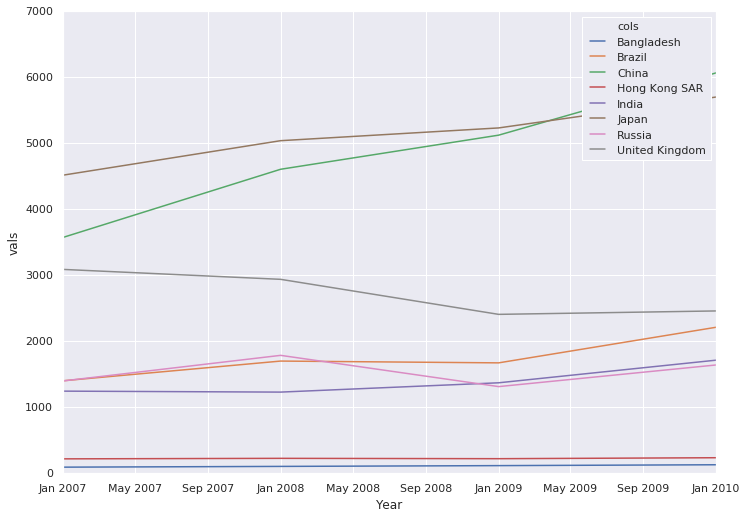

In [224]:
'''The financial crisis and all countries recorded a dip in their pattern of growth
'''

df_m4_5 = df_m4.drop(['United States'],axis=1).iloc[27:31]
df_m5 = df_m4_5.melt('Year', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Year", y="vals", hue='cols', data=df_m5 )#, height=10, aspect=11.7/8.27)

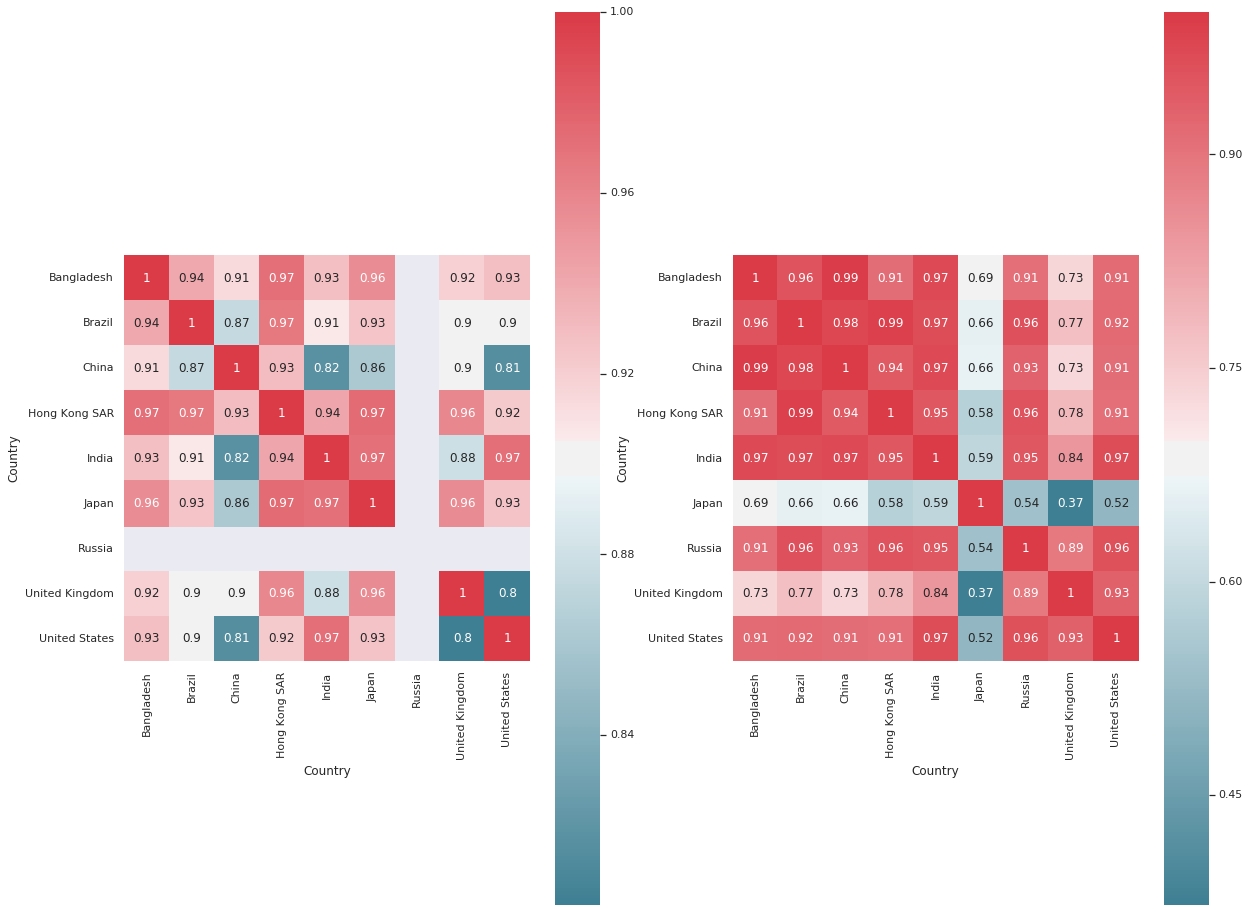

In [220]:
'''
The graph below is correlation between countries from 1980-2019

In first 10 years the correlations are in general low while in last decade it has been higher for most countries with exceptions.
Write something about Japan
'''
f, ax = plt.subplots(1,2, figsize=(20, 16))

corr = df_m4.iloc[0:10].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)

corr = df_m4.iloc[20:30].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)
fig.show()